<a href="https://colab.research.google.com/github/amercadel/BMI6334-Deep-Learning-in-Biomedical-Informatics/blob/main/HW2_Alexander_Mercadel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [ ]:
from fastai.vision.all import *
import os

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download zhizhid/dr-2000

Dataset URL: https://www.kaggle.com/datasets/zhizhid/dr-2000
License(s): unknown
100% 1.90G/1.90G [01:12<00:00, 27.6MB/s]
100% 1.90G/1.90G [01:12<00:00, 28.2MB/s]


In [ ]:
!mkdir dr_data
!unzip -qq dr-2000.zip -d dr_data

In [ ]:
data = ImageDataLoaders.from_folder("/content/dr_data", valid_pct = 0.2, size = 128, bs = 50, item_tfms=Resize(224))

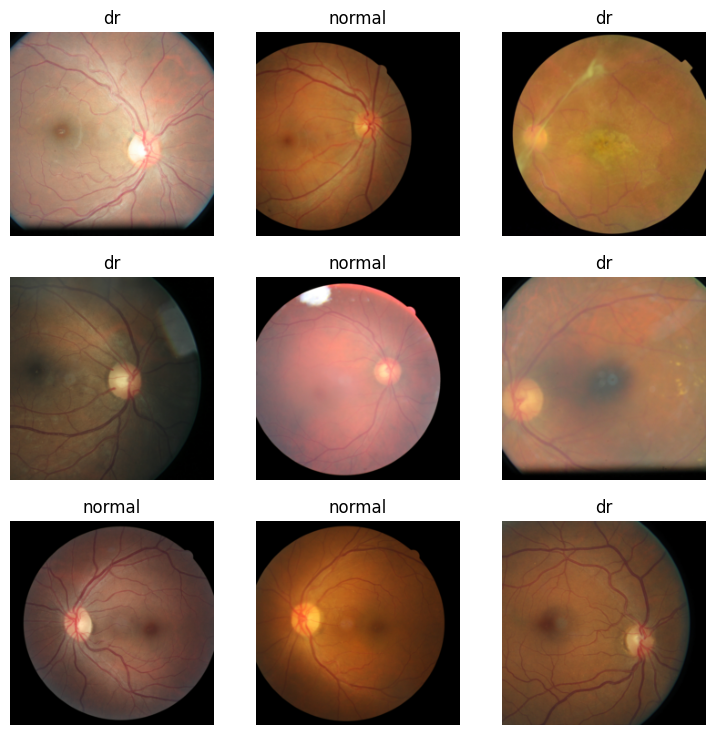

In [ ]:
data.show_batch()

In [ ]:
learn = vision_learner(data, resnet101, metrics=[error_rate])

I initally used resnet50, but after letting the model train for a while, I was unable to get an acceptable error rate, so I switched to resent101

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0003311311302240938)

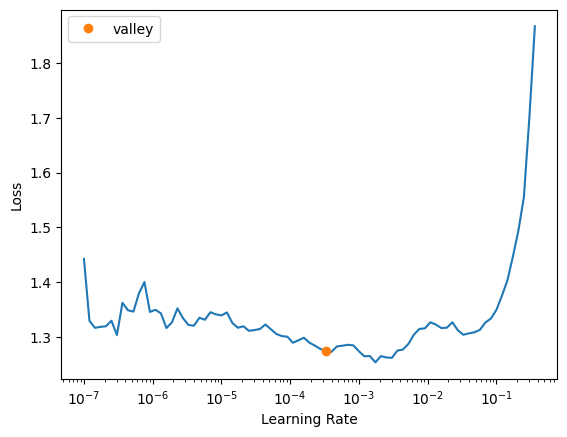

In [ ]:
learn.lr_find()

The recommended learning rate from fastai is 0.0003311311302240938. Based on the curve generated, there are other learning rates that would work, but I will proceed with the learing rate fastai suggests.

In [ ]:
learn.fit_one_cycle(20, 0.0003311311302240938)

epoch,train_loss,valid_loss,error_rate,time
0,1.280589,0.723233,0.390000,04:17
1,1.210990,0.695336,0.337500,03:49
2,1.114583,0.664428,0.337500,03:34
3,1.038734,0.733827,0.330000,03:32
4,0.998023,0.735604,0.360000,03:28
5,0.961865,0.732468,0.340000,03:27
6,0.928785,0.794461,0.377500,03:24
7,0.866175,0.721642,0.317500,03:28
8,0.805170,0.720995,0.330000,03:26
9,0.765979,0.724140,0.337500,03:27


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7cbaac42b520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7cbaac42b520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

After running 20 epochs, I was unable to get the error_rate under 0.3, but since it got fairly close, I decided to let the model train for a little bit longer to let it get there.

In [ ]:
learn.fit_one_cycle(10, 0.0003311311302240938)

epoch,train_loss,valid_loss,error_rate,time
0,0.577446,0.696970,0.312500,03:28
1,0.566298,0.707083,0.335000,03:28
2,0.572291,0.682231,0.310000,03:29
3,0.560619,0.660500,0.327500,03:30
4,0.542583,0.725847,0.332500,03:27
5,0.529613,0.696177,0.330000,03:26
6,0.533906,0.666416,0.290000,03:28
7,0.516055,0.692057,0.327500,03:25
8,0.497326,0.684988,0.317500,03:26
9,0.467141,0.672910,0.305000,03:28


After a further 10 epochs of training, I was able to get the loss down to 0.29, which is below the 0.3 threshold. In this iteration of the model, the model is able to avoid making an error in 71% of instances it sees. After my initial try using resnet 50 (not shown), where the error rate stopped decreasing at around 0.4, I would consider resnet101 as a better tool for this task. In addition, in a real environment, I would be willing to let the model train for more than about an hour, like I did here, so further performance increases are possible.